# Resolución de ejercicios: Capítulo Machine Learning
## Autores: Eduardo Cuadros, Juan Barrera



# Support Vector Machine (SVM)

El **Support Vector Machine** es un algoritmo de machine learning para aprendizaje supervisado usado en problemas de clasificación y regresión. Consiste en encontrar el mejor hiperplano que separa las diferentes clases de datos. Este algoritmo es muy útil cuando se quiere hacer una clasificación binaria, ya que el objetivo principal de SVM es maximizar el margen entre ambas clases. Entre más grande es el margen, mejor rendimiento tiene el modelo en nuevos datos.

### Pasos:
- Define un conjunto de datos: Características y etiquetas de clase.
- Selecciona un kernel: Se elige un kernel según la naturaleza del problema.
- Entrena el modelo: Se busca el hiperplano que maximiza el margen.
- Clasificación: Se clasifican nuevos puntos de prueba para evaluar el modelo.

### Ejemplo de implementación
Se va a implementar una aplicación para clasificar 3 clases de flores usando el dataset *Iris*. Primero se van a importar las librerías necesarias.

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

Luego se carga el dataset iris, se normalizan las características para mejorar la precisión del model y se divide el dataset en conjuntos de entrenamiento y prueba. Para este caso usarémos solo 2 características del dataset para poder visualizar el plano que separa las clases.

In [13]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lo siguiente que hacemos es entrenar el modelo con el kernel radial RBF, debido a que estamos manejando un problema no lineal.

In [14]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

SVC(C=1)

Luego evaluamos el modelo con el conjunto de prueba y mostramos el reporte de clasificación. Este reporte muestra la precisión, recall y f1-score del modelo.

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



Lo que haremos ahora es visualizar los hiperplanos que separan las clases.

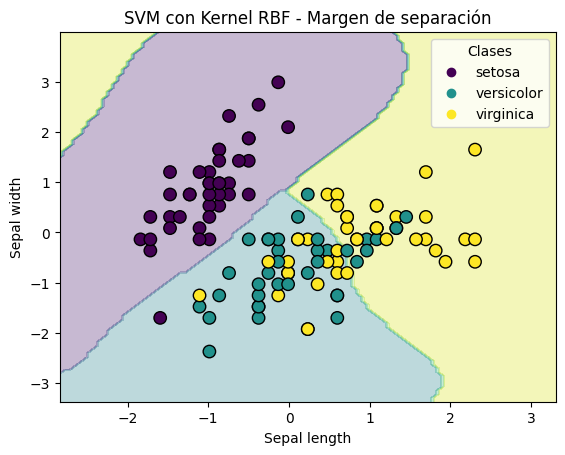

In [20]:
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=80)

handles, _ = scatter.legend_elements()
plt.legend(handles, iris.target_names, title="Clases")

plt.title('SVM con Kernel RBF - Margen de separación')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

EN conclusión, el SVM es muy eficiente para clasificación en problemas lineales y no lineales, con la capacidad de utilizar el truco del kernel. Es ideal para problemas donde se requiere una clara separación entre clases. La implementación práctica de SVM en Python es sencilla usando sklearn, y ajustando parámetros como C, gamma y el kernel se pueden obtener buenos resultados en aplicaciones reales.